In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split

def printmd(string):
    display(Markdown(string))
    

%  matplotlib inline

In [9]:
#adult = pd.read_csv('adult.csv')

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

train = pd.read_csv('adult_data.txt', sep=",\s", header=None, names = column_names, engine = 'python')
test = pd.read_csv('adult_test.txt', sep=",\s", header=None, names = column_names, engine = 'python')
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')


adult = pd.concat([test,train])
adult.reset_index(inplace = True)

In [10]:
# Setting all the categorical columns to type category
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
print(adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
index              48842 non-null int64
age                48842 non-null int64
workclass          48842 non-null category
fnlwgt             48842 non-null int64
education          48842 non-null category
educational-num    48842 non-null int64
marital-status     48842 non-null category
occupation         48842 non-null category
relationship       48842 non-null category
race               48842 non-null category
gender             48842 non-null category
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null category
income             48842 non-null category
dtypes: category(9), int64(7)
memory usage: 3.0 MB
None


In [11]:
# Top 5 records
adult.head()

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
# Feature avaiable
for i in adult.columns:
    print(i)

index
age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


In [13]:
# Summary Statistics
adult.describe()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,13566.611113,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,8999.435232,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,6105.000000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,12210.000000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,20349.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

## Education

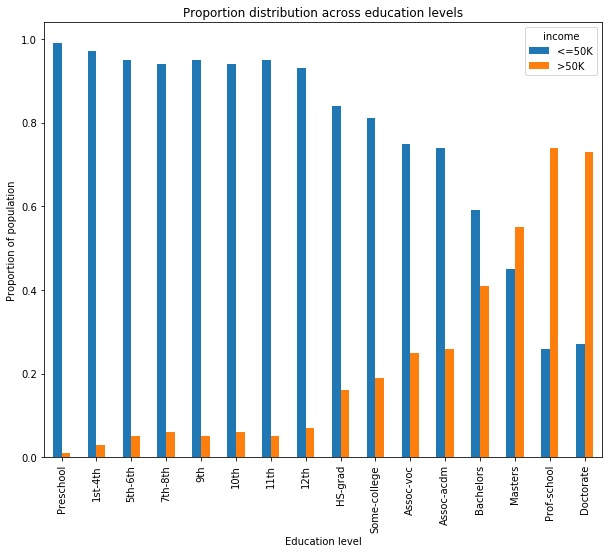

In [15]:
printmd('## Education')

education = round(pd.crosstab(adult.education, adult.income).div(pd.crosstab(adult.education, adult.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

print()

## Gender

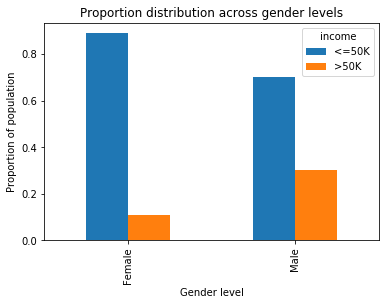

In [17]:
printmd('## Gender')

gender = round(pd.crosstab(adult.gender, adult.income).div(pd.crosstab(adult.gender, adult.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

print()

## Occupation

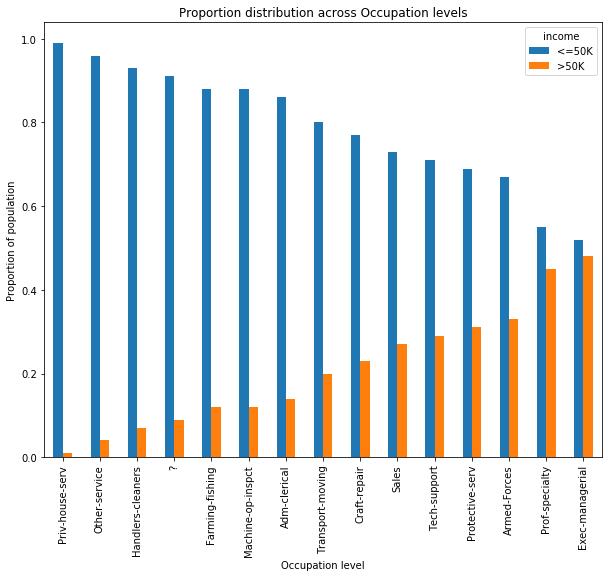

In [18]:
printmd('## Occupation')

occupation = round(pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

## Workclass

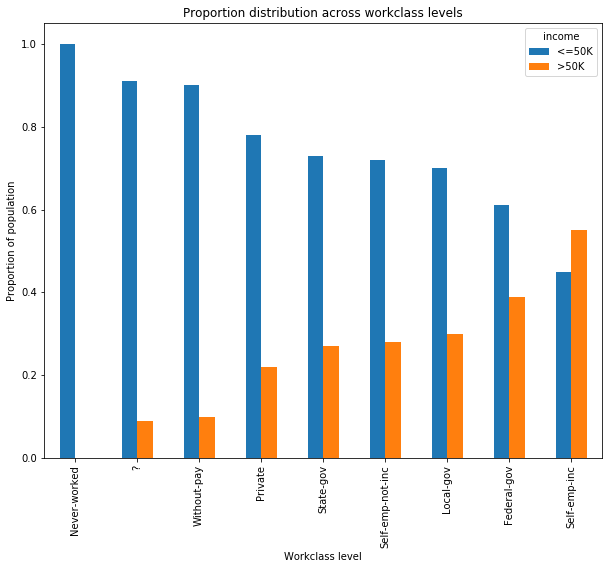

In [19]:
printmd('## Workclass')

workclass = round(pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

## Race

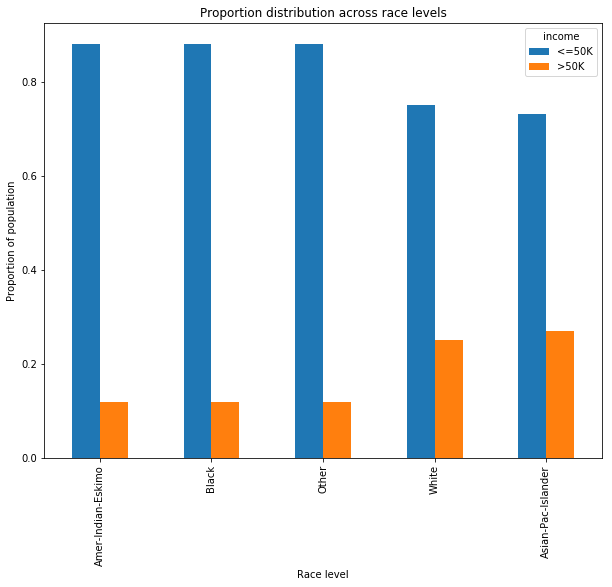

In [20]:
printmd('## Race')

race = round(pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

print()

## Native Country

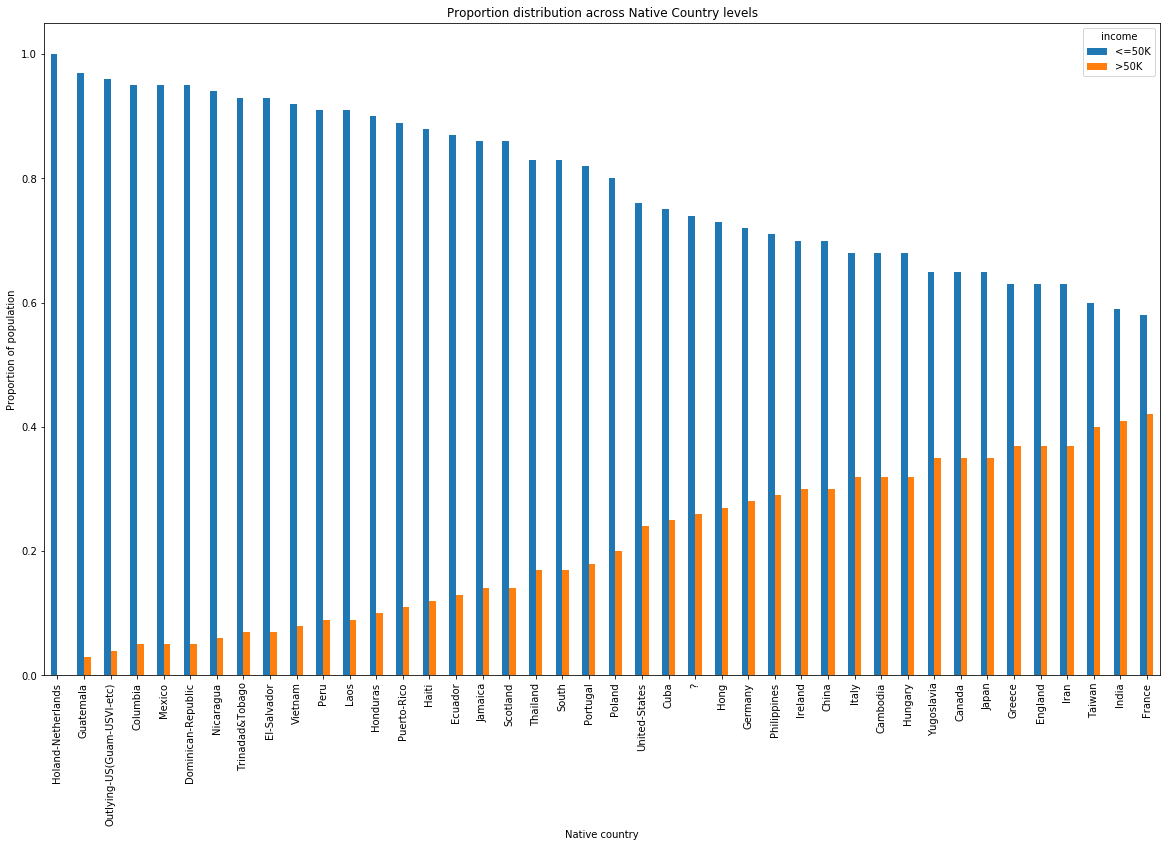

In [21]:
printmd('## Native Country')

native_country = round(pd.crosstab(adult['native-country'], adult.income).div(pd.crosstab(adult['native-country'], adult.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

print()

## Hours per week

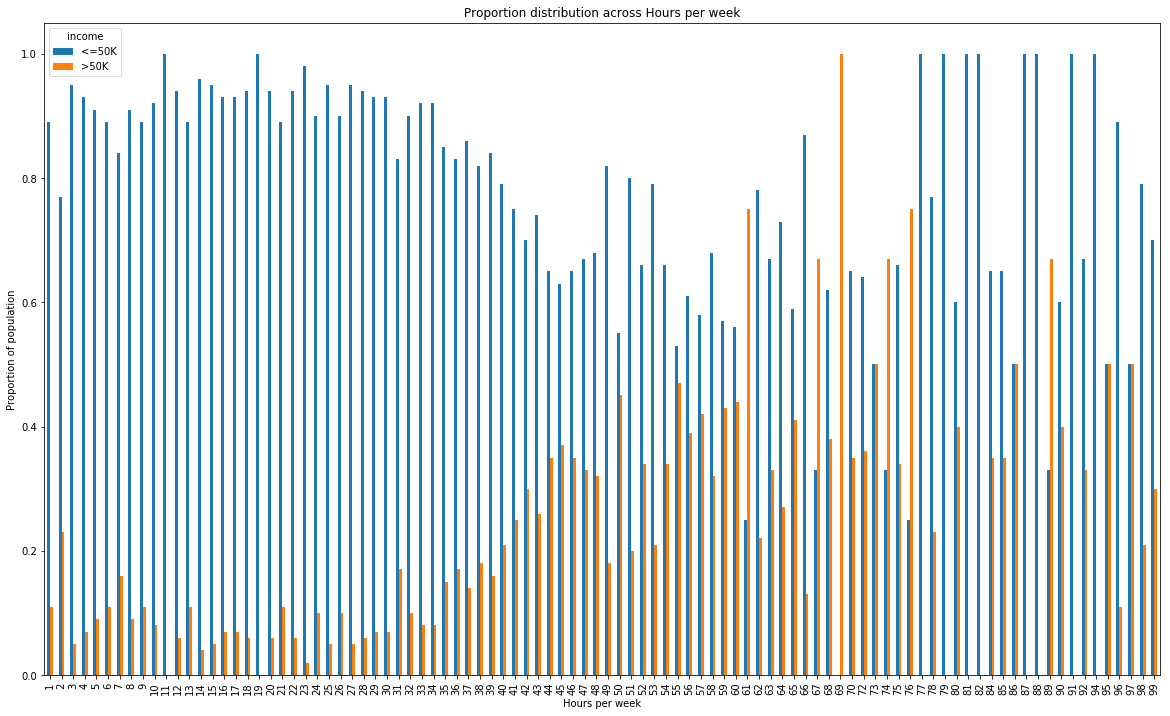

In [22]:
printmd('## Hours per week')

hours_per_week = round(pd.crosstab(adult['hours-per-week'], adult.income).div(pd.crosstab(adult['hours-per-week'], adult.income).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

print()

## Hours worked across working classes

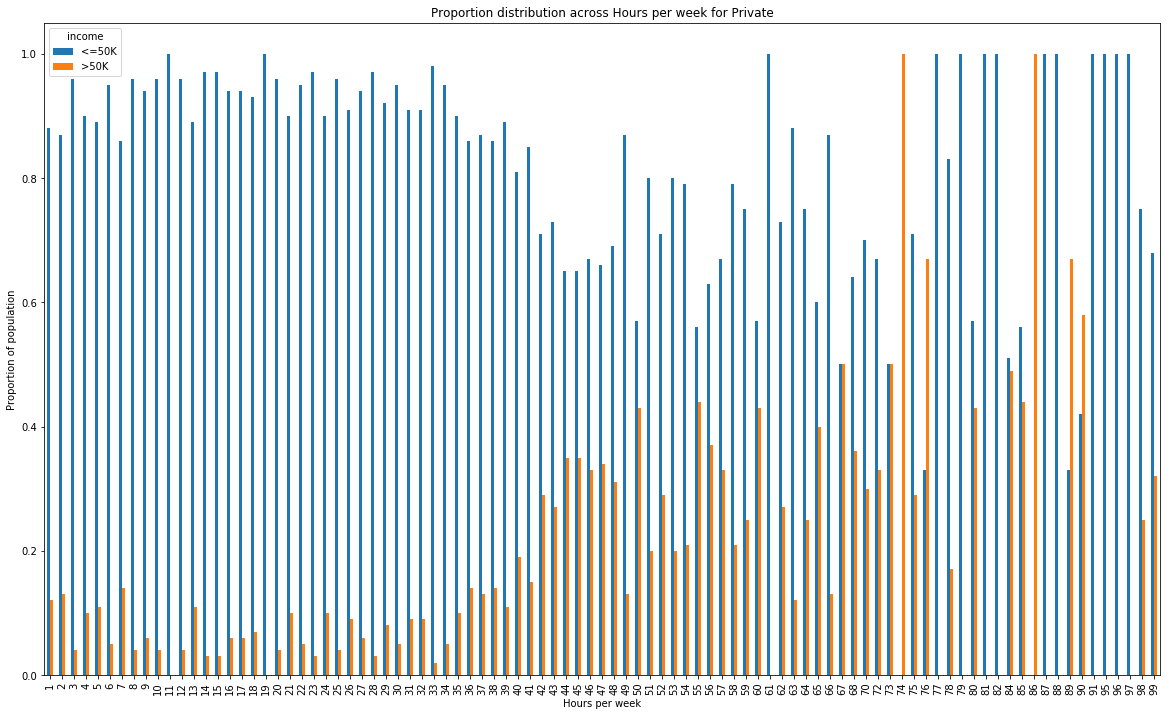

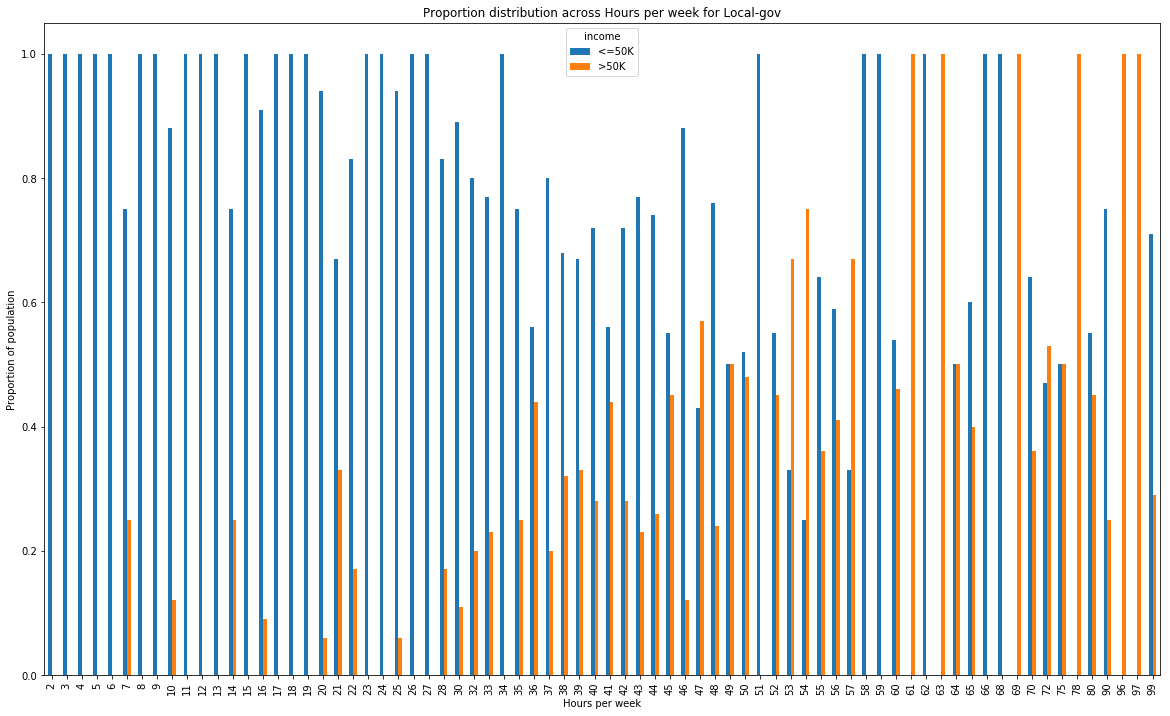

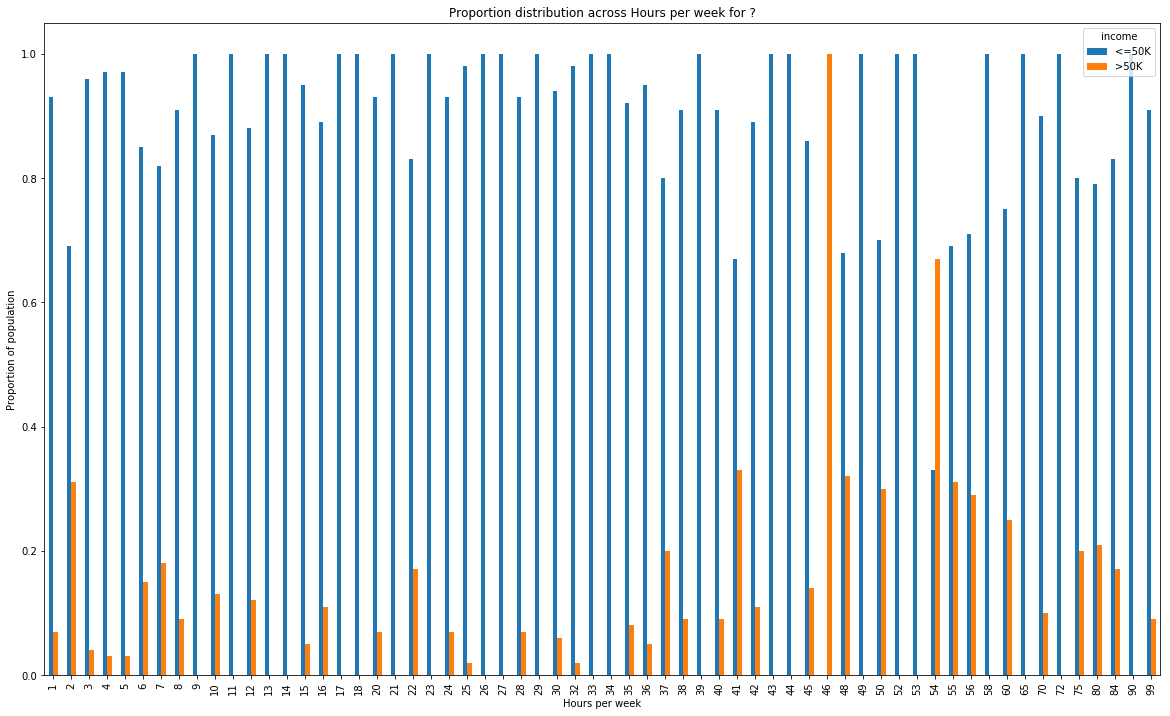

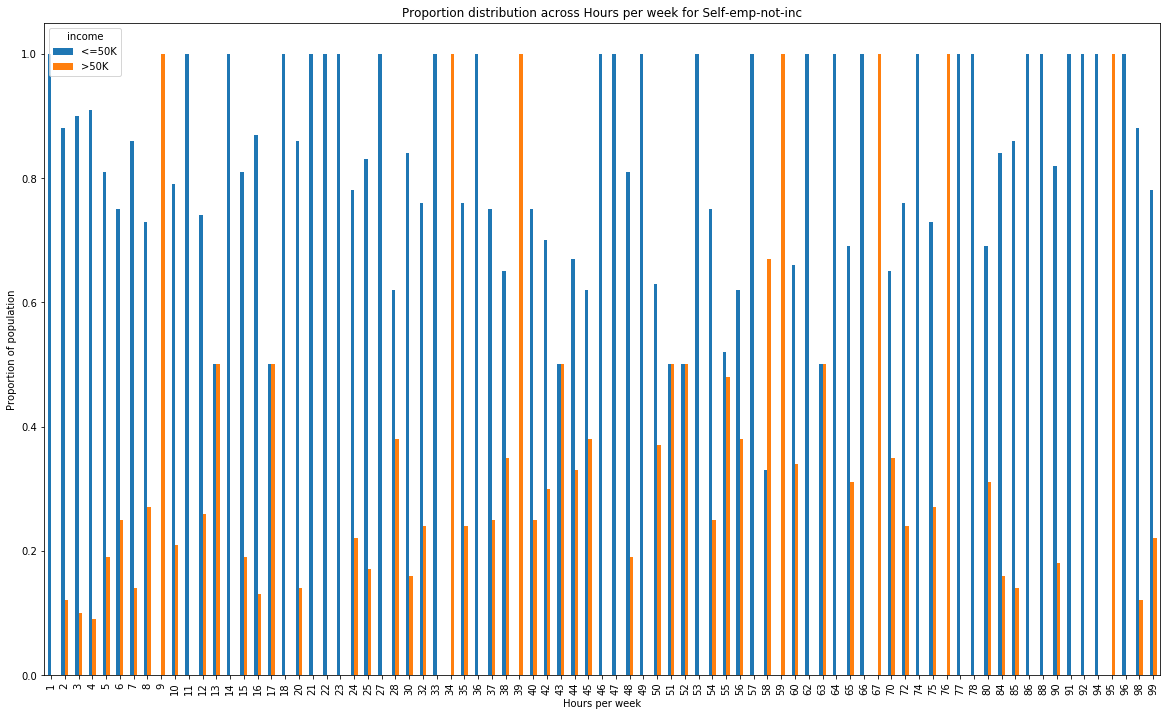

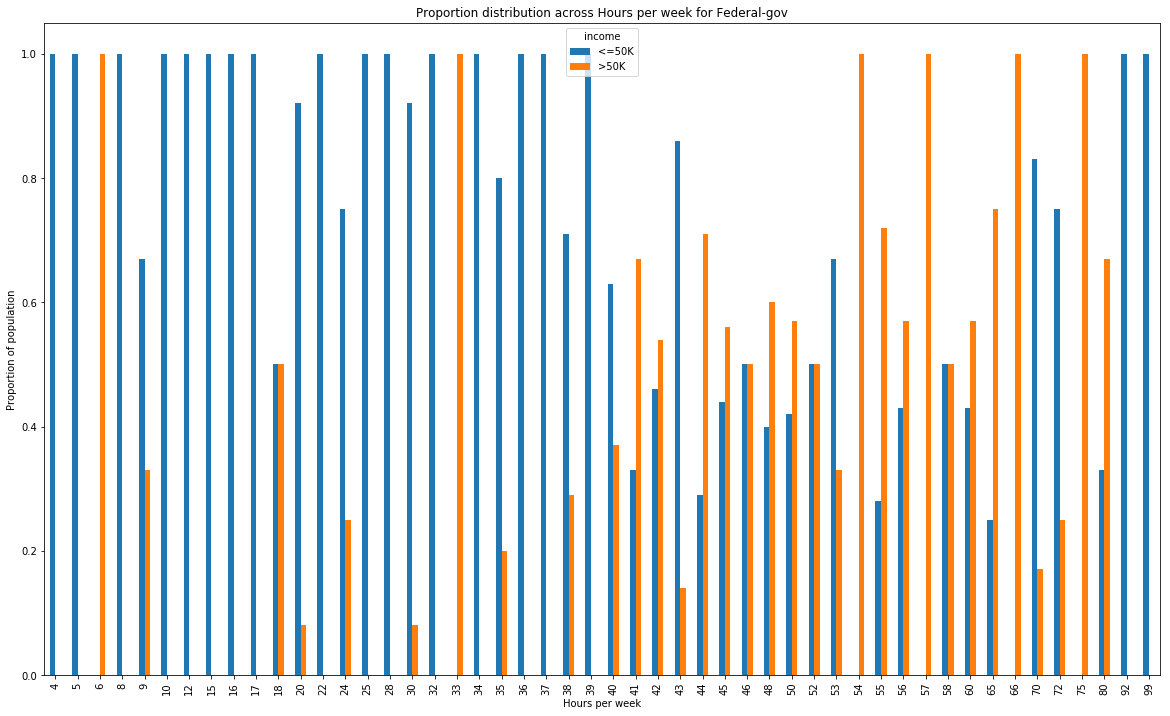

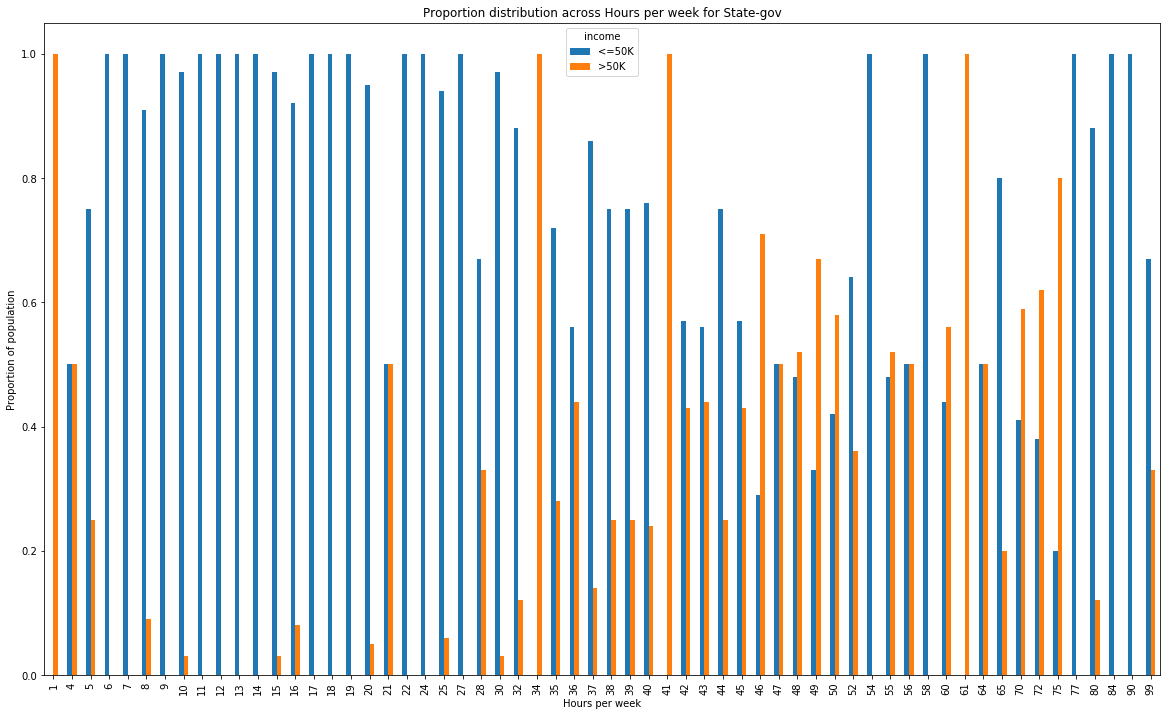

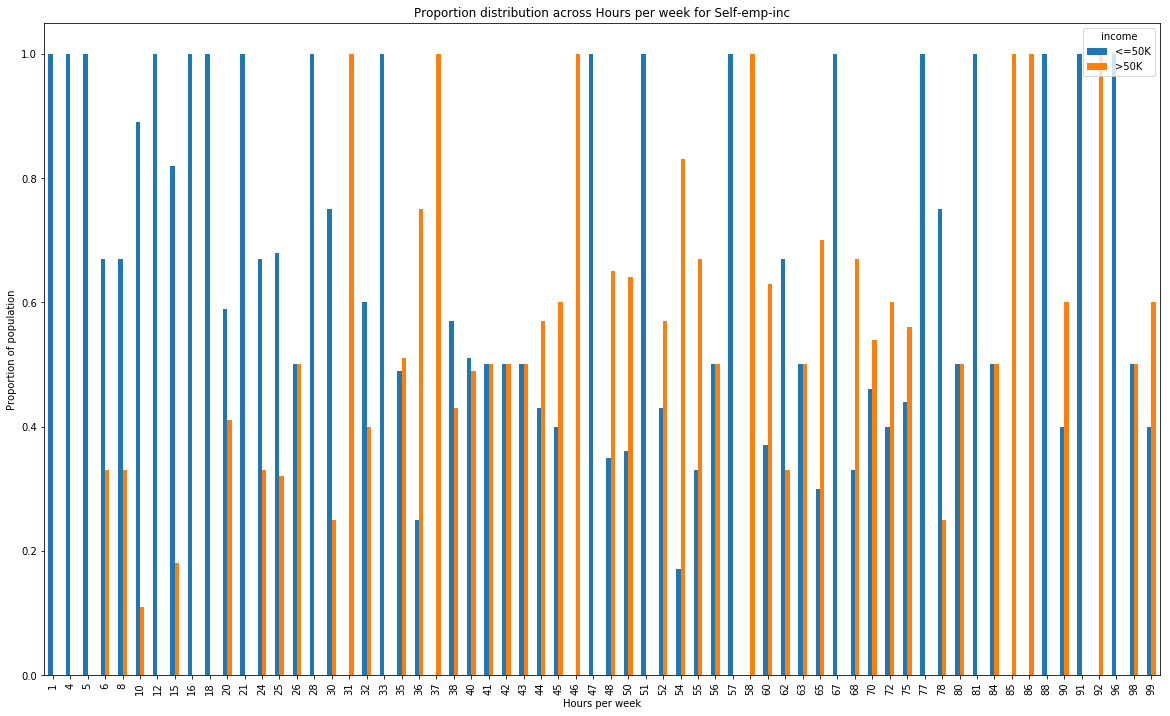

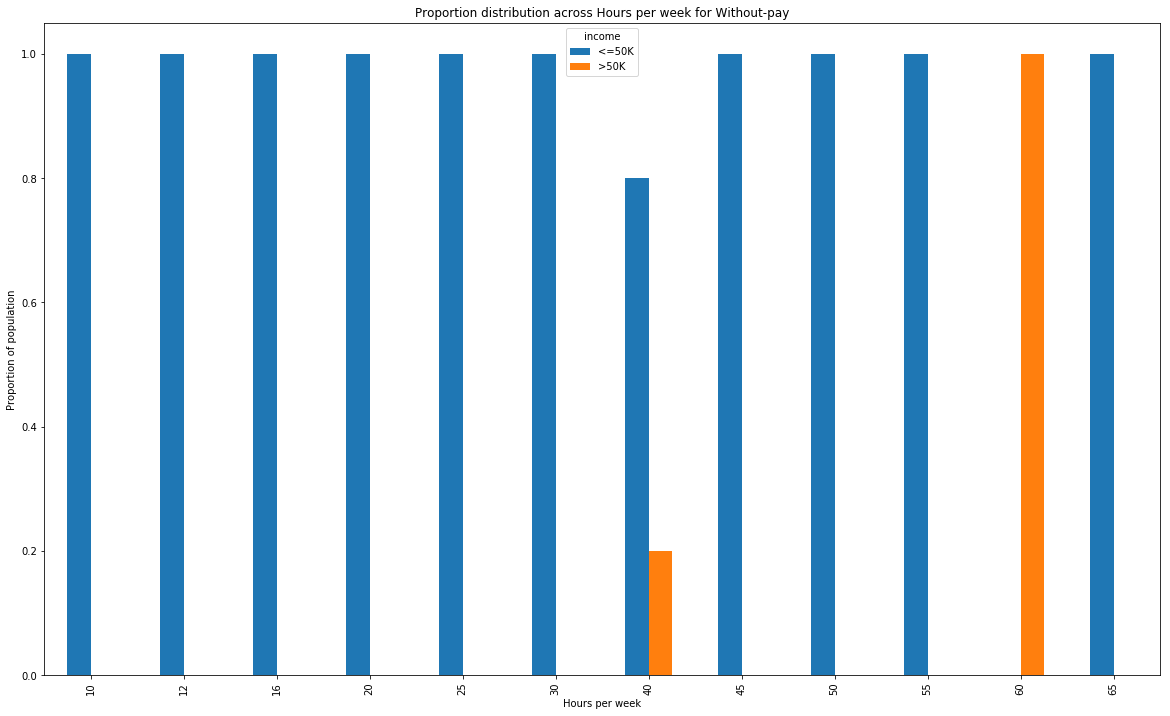

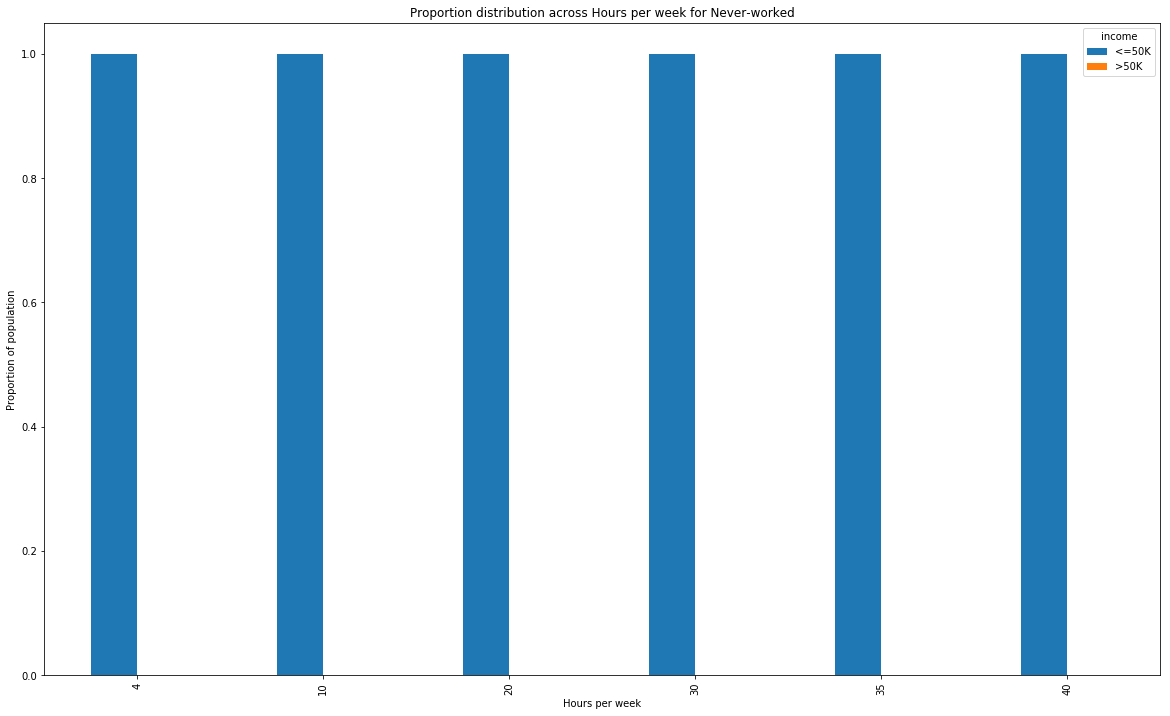

In [29]:
printmd('## Hours worked across working classes')

for i in adult.workclass.unique():
    df = adult[adult.workclass == i]

    hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
    # hours_per_week.sort_values(by = '>50K', inplace = True)
    ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week for '+ i, figsize = (20,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')

    print()

# Classification

In [ ]:
adult_data = adult.drop(columns = ['income'])
adult_label = adult.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')

train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)

## 1. Decision Tree

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score



clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)
accuracy_score(test_label,clf_pred)

In [ ]:
# from sklearn.tree import export_graphviz
# from IPython.display import SVG
# from graphviz import Source



# graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=train_data.columns))

# # Display Tree
# SVG(graph.pipe(format='svg'))

# # Save Tree as PNG
# png_bytes = graph.pipe(format='png')
# with open('dtree_pipe.png','wb') as f:
#     f.write(png_bytes)



## 2. Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(activation = 'tanh', solver='adam', alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
ann.fit(train_data, train_label)                         
ann_pred = ann.predict(test_data)
accuracy_score(test_label,ann_pred)

# Solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score.

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann.fit(train_data, train_label)                         
ann_pred = ann.predict(test_data)
accuracy_score(test_label,ann_pred)

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann.fit(train_data, train_label)                         
ann_pred = ann.predict(test_data)
accuracy_score(test_label,ann_pred)

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(activation = 'identity', solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann.fit(train_data, train_label)                         
ann_pred = ann.predict(test_data)
accuracy_score(test_label,ann_pred)

In [ ]:
# Since MLP is sensitive to feature scaling 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data) 

ann = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann.fit(train_data, train_label)                         
ann_pred = ann.predict(test_data)
accuracy_score(test_label,ann_pred)

## 3. Support Vector Machine

In [ ]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(train_data, train_label)
svm_pred = svm_clf.predict(test_data)
accuracy_score(test_label, svm_pred)

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(train_data, train_label)
svm_pred = svm_clf.predict(test_data)
accuracy_score(test_label, svm_pred)

## 4. Ensemble Models

### 4.1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)
accuracy_score(test_label, r_forest_pred)


### 4.2. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
accuracy_score(test_label, ada_pred)

## 5. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
accuracy_score(test_label, log_reg_pred)

## 6. k Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data, train_label) 
    knn_pred = knn.predict(test_data)
    print((i,accuracy_score(test_label, knn_pred)))